In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- No missing values in any of the input columns
- Data type of the columns is also consistent with the information it is trying to represent

In [ ]:
# check for duplicated rows
df.duplicated().sum()

0

- No rows duplicated

In [3]:
# check how many customers have left and how many have stayed back
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

- Dataset is somewhat imbalanced
- Ignoring imbalances for now

In [4]:
# check geographical distribution
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

- Uneven distribution of customers across three regions

In [5]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

- Fairly distributed across males and females

In [6]:
df.drop(columns=["Surname", "RowNumber", "CustomerId"], inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Categorical to numerical
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

- France as 0, 0 (3 columns using 2 columns)
- Female as 0 (2 columns using 1 column)

In [8]:
# Scale values to enable the neural network to converge quickly
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9069,619,32,4,175406.13,2,1,1,172792.43,0,1,0
2603,643,34,7,160426.07,1,0,1,188533.11,1,0,0
7738,561,33,6,0.00,2,0,0,173680.39,0,0,1
1579,618,41,8,37702.79,1,1,1,195775.48,1,0,1
5058,714,37,9,148466.93,2,0,1,151280.96,0,0,1


In [12]:
X_train.shape

(7000, 11)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.34459497, -0.65674999, -0.34217046, ..., -0.57559072,
         1.73073215, -1.09823226],
       [-0.09518109, -0.46637979,  0.69816249, ...,  1.73734559,
        -0.57779016, -1.09823226],
       [-0.94734518, -0.56156489,  0.35138484, ..., -0.57559072,
        -0.57779016,  0.91055421],
       ...,
       [ 0.86090545, -0.08563939, -1.38250341, ..., -0.57559072,
        -0.57779016, -1.09823226],
       [ 0.15423279,  0.39028611,  1.04494014, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [ 0.46600014,  1.1517669 , -1.38250341, ...,  1.73734559,
        -0.57779016,  0.91055421]])

- Every row of the array represents scaled features

In [ ]:
len(X_train_scaled[0])

11

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

# 1st hidden layer has 3 nodes and is expecting inputs of 11 dimensions
model.add(Dense(3, activation='sigmoid', input_dim=11))
# Output layer with 1 node
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# at compilation, specify loss and optimizer (key points)
model.compile(loss='binary_crossentropy', optimizer='SGD')

- Binary classification, use given loss
- Stochastic Gradient Descent (SGD) for updating the model parameters

In [ ]:
# train the neural network
model.fit(X_train_scaled, y_train, epochs=50)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Loss decreasing at every step (ideally!)
- Model training complete; have obtained our optimal weights and biases

In [ ]:
model.layers[0].get_weights()

- 11 x 3 weight matrix obtained at the point of connecting input layer and hidden layer
- 3 biases; one for each node in the hidden layer

In [ ]:
model.layers[1].get_weights()

[array([[-1.4619654],
        [ 1.47026  ],
        [-2.1145465]], dtype=float32),
 array([-0.25744134], dtype=float32)]

- 3 x 1 weight matrix obtained at the point of connecting hidden layer with output layer
- 1 bias for the output node

In [ ]:
model.predict(X_test_scaled)

94/94 [==============================] - 0s 891us/step


array([[0.21572888],
       [0.06605855],
       [0.29681402],
       ...,
       [0.05782799],
       [0.04555474],
       [0.20085633]], dtype=float32)

- Output obtained for each input in the test set
- Output is a probability value, not 0 or 1 because we are using sigmoid activation function

In [ ]:
y_prob = model.predict(X_test_scaled)

94/94 [==============================] - 0s 933us/step


In [ ]:
# choosing a threshold of 0.5
y_hat = np.where(y_prob >= 0.5, 1, 0)

- If probability is at least 0.5, the customer left. Otherwise, the customer stayed

In [23]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_hat)

0.817

### Steps to improve the neural network performance
- Increase the number of epochs (try 200, 500, 1000)
- Change activation function in hidden layer to rectified linear unit
- Increase the number of nodes in the hidden layer (try 4, 8, 16)
- Try with two hidden layers

#### Change activation function in hidden layer to relu

In [ ]:
model2 = Sequential()

# 1st hidden layer has 11 nodes and is expecting inputs of 11 dimensions
model2.add(Dense(11, activation='relu', input_dim=11))
# 2nd hidden layer has 11 nodes
model2.add(Dense(11, activation='relu'))
# Output layer with 1 node
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

In [ ]:
model2.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [ ]:
# model2.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)
history = model2.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

- Train accuracy and validation accuracy have improved well over time meaning there is no overfitting
- Want loss to decrease and accuracy to increase

In [ ]:
y_prob2 = model2.predict(X_test_scaled)

94/94 [==============================] - 0s 880us/step


In [ ]:
y_hat2 = np.where(y_prob2>=0.5, 1, 0)

In [ ]:
accuracy_score(y_test, y_hat2)

0.866

In [29]:
import matplotlib.pyplot as plt

In [ ]:
history.history

In [ ]:
type(history.history)

dict

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

- loss refers to training loss
- accuracy refers to training accuracy

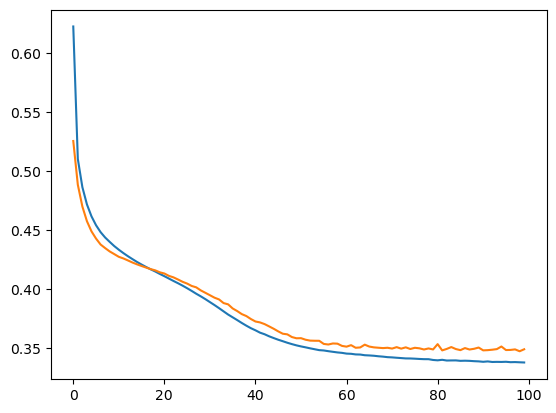

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

- Gap at the tail end gives an idea about overfitting; not much in this case

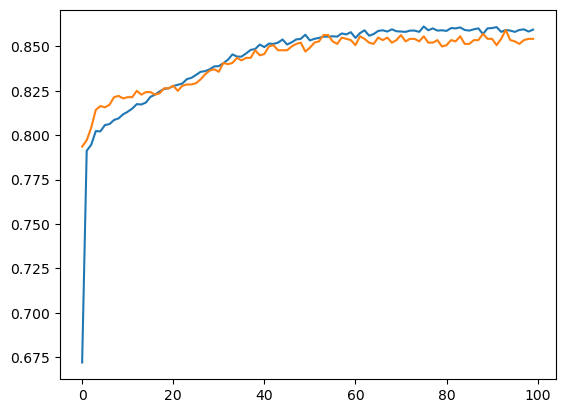

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

- Nice overlap at the top right corner

### Key takeaways
- Build our own neural network using keras library
- Relating theoretical neural networks drawn using pen and paper with neural networks obtained using code by estimating the number of parameters
- Going from black box to glass box
- Not trying to build the best model but understanding how neural network models can be constructed using code
- Can use regularization techniques like dropout to improve performance of the model

Model 2: 1st hidden layer uses relu activation function

In [30]:
model = Sequential()

# 1st hidden layer has 3 nodes and is expecting inputs of 11 dimensions
model.add(Dense(3, activation='relu', input_dim=11))
# Output layer with 1 node
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy', optimizer='SGD')
model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5831
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.5196
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4885
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4682
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4541
Epoch 6/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4441
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4370
Epoch 8/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4324
Epoch 9/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4293
Epoch 10/50
219/219 [==============================] - 1s 2ms/step - loss: 0.4270
Epoch 11/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4253
Epoch 12/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4241
Epoch 13/50
219/219 [====

In [25]:
model.layers[0].get_weights()
model.predict(X_test_scaled)
y_prob = model.predict(X_test_scaled)
y_hat = np.where(y_prob >= 0.5, 1, 0)
print(accuracy_score(y_test, y_hat))

94/94 [==============================] - 0s 2ms/step
0.8326666666666667


Model 3: 1st hidden layer uses relu activation function and 2nd hidden layer uses sigmoid activation function

In [26]:
model3 = Sequential()

# 1st hidden layer has 11 nodes and is expecting inputs of 11 dimensions
model3.add(Dense(11, activation='relu', input_dim=11))
# 2nd hidden layer has 11 nodes
model3.add(Dense(11, activation='sigmoid'))
# Output layer with 1 node
model3.add(Dense(1, activation='sigmoid'))

In [27]:
model3.compile(loss='binary_crossentropy', optimizer='SGD')
model3.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 0.5143
Epoch 2/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5075
Epoch 3/50
219/219 [==============================] - 1s 4ms/step - loss: 0.5039
Epoch 4/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5006
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4972
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4939
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4905
Epoch 8/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4870
Epoch 9/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4835
Epoch 10/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4799
Epoch 11/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4762
Epoch 12/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4726
Epoch 13/50
219/219 [====

In [28]:
model3.layers[0].get_weights()
model3.predict(X_test_scaled)
y_prob = model3.predict(X_test_scaled)
y_hat = np.where(y_prob >= 0.5, 1, 0)
print(accuracy_score(y_test, y_hat))

94/94 [==============================] - 0s 1ms/step
0.8353333333333334
